<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#General-Information" data-toc-modified-id="General-Information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>General Information</a></span></li><li><span><a href="#Preparing-data" data-toc-modified-id="Preparing-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparing data</a></span><ul class="toc-item"><li><span><a href="#Column-Naming" data-toc-modified-id="Column-Naming-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Column Naming</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Changing-data-types" data-toc-modified-id="Changing-data-types-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Changing data types</a></span></li></ul></li><li><span><a href="#Analyzing-the-data" data-toc-modified-id="Analyzing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyzing the data</a></span></li><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hypothesis</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Identifying factors that determine a video game's success

We are working for the online store Ice, which sells video games all over the world. We have access to user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns

## General Information

We will import the necessary libaries for our project

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [126]:
games = pd.read_csv('/datasets/games.csv')

In [127]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [128]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [129]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



* We have opened the file and looked at its general information. 

* We have a dataset with 16,715 entries and 11 columns. We can already observe some columns have missing or null values, and data types will need to be adjusted as well. Let's polish the data for the further analysis.

## Preparing data

### Column Naming

In [130]:
games.columns = games.columns.str.lower()
#games['year_of_release'] = games['year_of_release'].astype(int)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Missing Values

In [131]:
miss_values = games.isna().sum().to_frame('missing_values')
miss_values['%'] = round(games.isnull().sum()/len(games),3)

miss_values



,missing_values,%
name,2,0.000
platform,0,0.000
year_of_release,269,0.016
genre,2,0.000
na_sales,0,0.000
eu_sales,0,0.000
jp_sales,0,0.000
other_sales,0,0.000
critic_score,8578,0.513
user_score,6701,0.401


### Duplicates

In [132]:
games.dropna(subset=['name'], inplace=True)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [133]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [134]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [135]:
games['year_of_release'] = games.groupby('name')['year_of_release'].transform(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [136]:
games.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [137]:
games.dropna(subset=['year_of_release'], inplace=True)

There were 269 missing values in the column 'year of release', out of which 123 was filled with the help of median values taken from orginal data. others will be dropped as there are not enough data to extract the year of release for those.

In [138]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
dtype: int64

In [139]:
games['name'].value_counts()

Need for Speed: Most Wanted                             12
Ratatouille                                              9
Madden NFL 07                                            9
FIFA 14                                                  9
LEGO Marvel Super Heroes                                 9
                                                        ..
DemiKids: Light Version                                  1
The Awakened Fate Ultimatum                              1
Stuart Little 2                                          1
Tank! Tank! Tank!                                        1
Dangerous Ji-San to 1000-nin no Otomodachi Yokoshima     1
Name: name, Length: 11426, dtype: int64

In [140]:
games[games['name'] == 'Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN
2442,Ratatouille,PS2,2007.0,Action,0.31,0.00,0.0,0.53,65.0,8,E
3069,Ratatouille,PSP,2007.0,Action,0.22,0.27,0.0,0.16,64.0,7.1,E
3902,Ratatouille,PS3,2007.0,Action,0.09,0.32,0.0,0.10,55.0,4.8,E
3948,Ratatouille,Wii,2007.0,Action,0.43,0.03,0.0,0.04,62.0,6.7,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.0,0.02,56.0,tbd,E
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65.0,tbd,E
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.0,0.00,60.0,5.6,E
14514,Ratatouille,PC,2007.0,Action,0.01,0.01,0.0,0.00,NaN,7.9,E


In [141]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

In [142]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [143]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [144]:
games['user_score'] = games['user_score'].replace('tbd', None)

In [145]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [146]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         7869
rating             6699
dtype: int64

### Changing data types 

In [147]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       8698 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [148]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [149]:
games['user_score'] = games['user_score'].astype('float64')

In [150]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       8698 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [151]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Global Sales**

In [152]:
games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

In [153]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Since the missing values in critic score, user score and rating are high in numbers we leave it as it is.

## Analyzing the data

**Game Releases throughout the years**

In [154]:
year_count=games.groupby('year_of_release')['name'].count()
year_count

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     340
2000     351
2001     486
2002     844
2003     784
2004     765
2005     948
2006    1019
2007    1202
2008    1441
2009    1430
2010    1269
2011    1153
2012     662
2013     548
2014     581
2015     606
2016     502
Name: name, dtype: int64

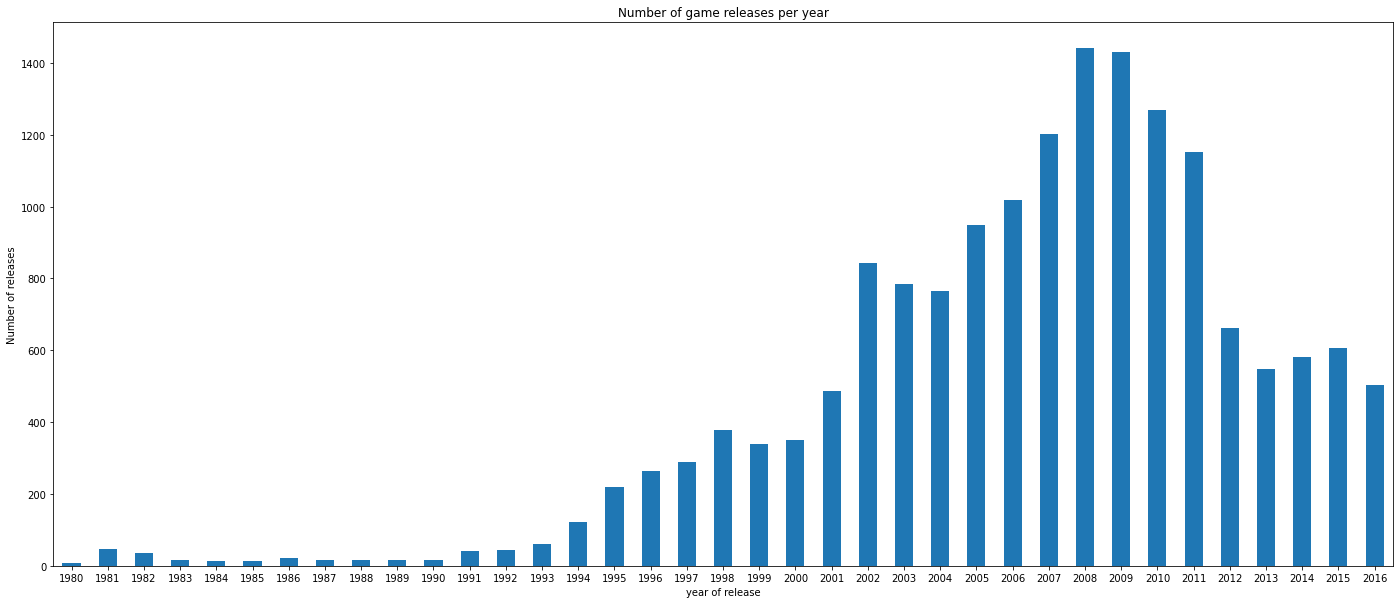

In [155]:
year_count.plot.bar(rot=0, figsize=(24, 10))
plt.title('Number of game releases per year')
plt.xlabel('year of release')
plt.ylabel('Number of releases')
plt.show()

* Between 1980 and 1995, fewer than 200 video games were released per year. Video games started becoming more popular from 1995 onward with 2001 having about 500 releases. 2002 saw a sharp increase; over 800 games were released that year. 2007 to 2011 are the top when it comes to releases, with 2009 boasting 1476 releases (the peak). Not all periods are significant.

In [156]:
games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [157]:
games_edit = games.query("year_of_release > 1994")

In [158]:
games_edit.groupby('year_of_release')['name'].count()

year_of_release
1995     219
1996     263
1997     289
1998     379
1999     340
2000     351
2001     486
2002     844
2003     784
2004     765
2005     948
2006    1019
2007    1202
2008    1441
2009    1430
2010    1269
2011    1153
2012     662
2013     548
2014     581
2015     606
2016     502
Name: name, dtype: int64

**Sales by platforms**

In [159]:
p=games_edit.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).reset_index()
p

,platform,total_sales
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.26
5,PS,721.55
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,3DS,258.53


* Total sales for platforms varies vastly with highest share of total sales belongs to 'PS2', and then follows other platforms with less 1000 total sales. Lowest 5 platforms only have very minimal amount of total sales. 

In [160]:
line=games_edit.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')
line

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,N64,NG,...,PSV,SAT,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1995,NaN,0.08,NaN,NaN,NaN,3.60,NaN,NaN,NaN,0.33,...,NaN,11.57,32.20,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,36.03,NaN,NaN,34.10,0.10,...,NaN,7.69,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,6.37,NaN,NaN,39.50,NaN,...,NaN,6.77,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,3.38,NaN,26.90,NaN,NaN,49.24,NaN,...,NaN,3.82,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,2.53,NaN,NaN,5.16,NaN,38.00,NaN,NaN,58.01,NaN,...,NaN,0.09,0.26,NaN,0.46,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.02,5.99,NaN,19.76,0.07,NaN,33.97,NaN,...,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN
2001,NaN,NaN,NaN,1.07,NaN,9.24,61.53,26.62,3.25,NaN,...,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,23.82,NaN
2002,NaN,NaN,NaN,0.29,NaN,NaN,74.16,52.22,0.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.00,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,56.67,51.27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.05,NaN


Text(0.5, 1.0, 'Sales by platforms')

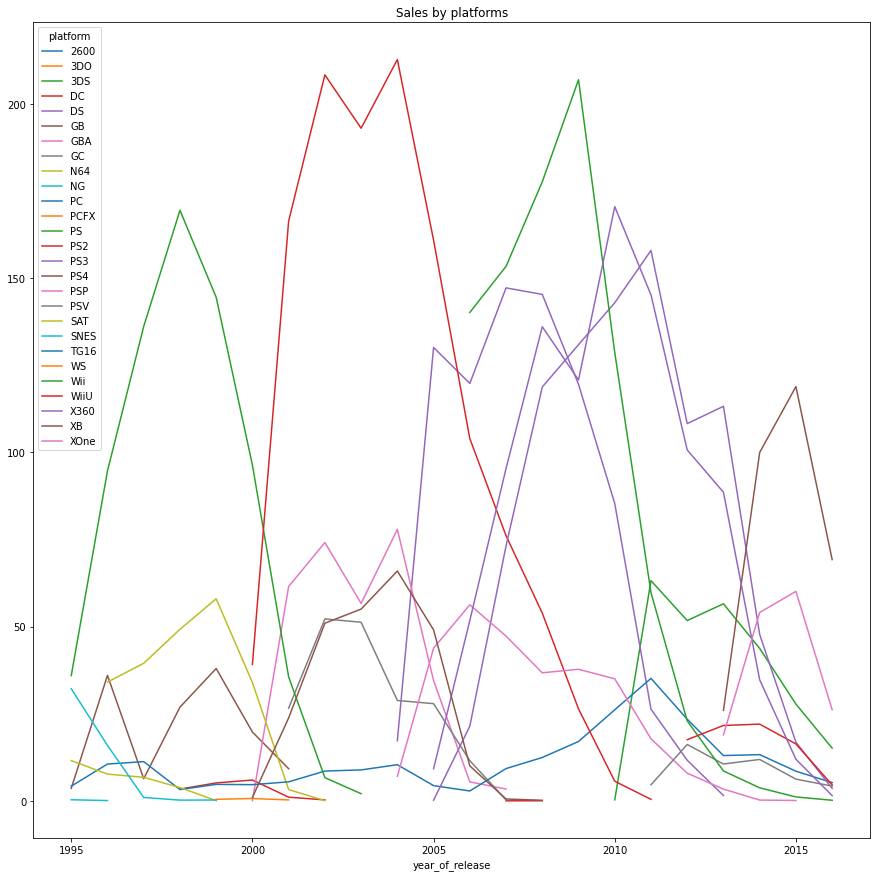

In [161]:
line.plot.line(figsize=(15,15))
plt.title('Sales by platforms')

* Total sales across platforms canges over years. Most platforms follows a life cycle where it reaches the peak sale volume and then declines to zero over years. 
* PS2 which has the highest total sales of 1247 had its peak sales period during 2003 and 2006 then declined the sales and reaches zero by 2012.
* Some other platforms that follows PS3 are X360, PS3 and WII
* It generally takes 2 to 3 years for the platroms to feel the increase in sales and also it generally takes 3 to 4 years for the platforms to decline sales from its maximum points. But in some cases, platforms donot experience the increse in sales and continue at the initial phase itself(this means that the game has not achieved expected sales)

**Filtering data to new dataframe which is relevant for drawing conclusions**

In [162]:
a=games_edit[games_edit['year_of_release'] == 2016]
active_2016 =a['platform'].unique()
active_2016

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [163]:
games_edit_1 = games_edit.loc[games_edit['platform'].isin(active_2016)]
games_edit_1 = games_edit_1.query('year_of_release>2010')
games_edit_1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


* For the forecast of 2017, we took data from 2010 as it is only necessary toconsider the recent years to analyse to draw a forecast on 2017
* For the forecast of 2017,we only took platforms that are active in 2016, because only the active platforms will be able to generate revenue in 2017. (here we neglect the concept of recativating a nonperformng platform)

* Making the above two filters, we have obtained a new dataframe and named it as game_edit_1

Text(0.5, 1.0, 'Total sales of platfroms')

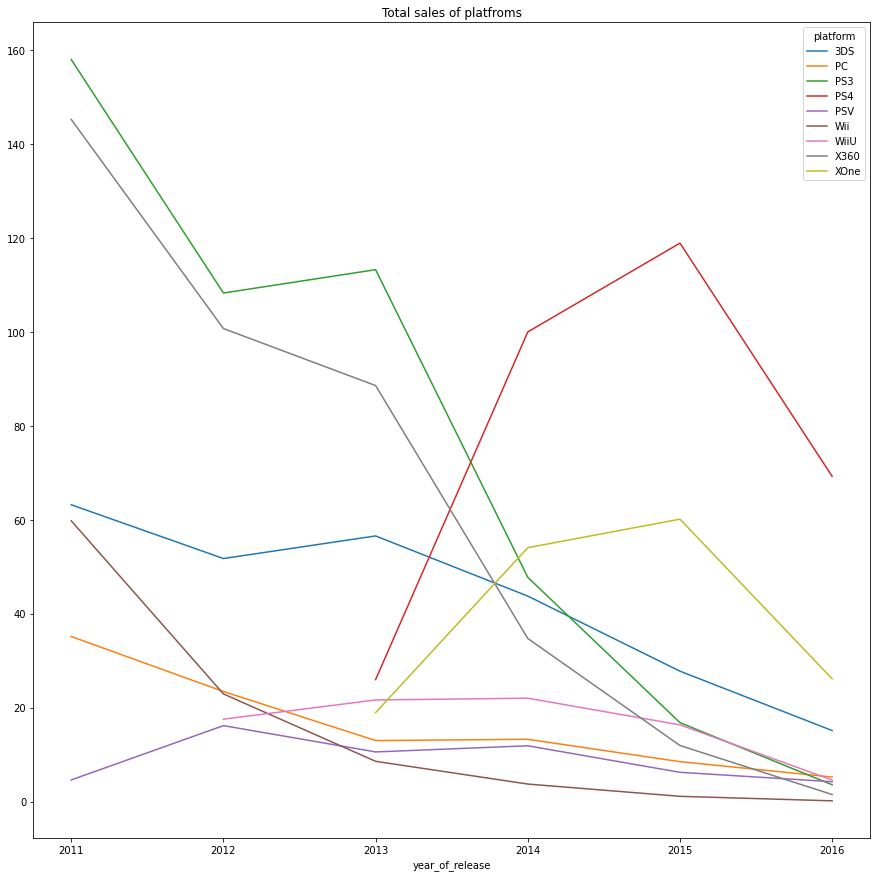

In [164]:
line_2=games_edit_1.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')
line_2.plot.line(figsize=(15,15))
plt.title('Total sales of platfroms')

In [165]:
line_2

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2011,63.20,35.16,157.98,NaN,4.63,59.79,NaN,145.23,NaN
2012,51.76,23.45,108.28,NaN,16.19,22.94,17.56,100.72,NaN
2013,56.57,13.01,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


* PS4 platform is leading in sales followed by XOne
* PS4, XOne, PS3 and X360 sales are shrinking drastically
* None of the platforms has shown positively incersing sales trend in recent years
* But PS4 and Xone can be considered as potentialy profitable platforms as these platfrom sales start declining only from 2015, a innovative update would help these platforms to gain positive momentum.


**Comparing sales on the potentially profitable platforms**

In [166]:
games_edit_1.groupby(['name','platform'])['total_sales'].sum()

name                          platform
 Beyblade Burst               3DS         0.03
 Fire Emblem Fates            3DS         1.67
 Frozen: Olaf's Quest         3DS         0.59
 Haikyu!! Cross Team Match!   3DS         0.04
 Tales of Xillia 2            PS3         0.84
                                          ... 
htoL#NiQ: The Firefly Diary   PSV         0.01
inFAMOUS 2                    PS3         1.82
inFAMOUS: Second Son          PS4         2.79
uDraw Studio: Instant Artist  Wii         0.17
                              X360        0.02
Name: total_sales, Length: 3543, dtype: float64

In [167]:
games_edit_1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [168]:
games_edit_1['name'].value_counts()

Lego Batman 3: Beyond Gotham                   8
Angry Birds Star Wars                          8
LEGO The Hobbit                                8
The LEGO Movie Videogame                       8
FIFA 15                                        8
                                              ..
Aikatsu! 365 Idol Days                         1
Labyrinth Cross Blood: Infinity                1
The Legend of Heroes VII: The Trail of Blue    1
Pro Yakyuu Famista 2011                        1
Kuma-Tomo                                      1
Name: name, Length: 2040, dtype: int64

In [169]:
games_edit_1.pivot_table(index='name', columns='platform',values='total_sales',aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,
Beyblade Burst,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tales of Xillia 2,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
de Blob 2,NaN,NaN,0.21,NaN,NaN,0.19,NaN,0.15,NaN
htoL#NiQ: The Firefly Diary,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN
inFAMOUS 2,NaN,NaN,1.82,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
games_edit_1.pivot_table(index='platform',values='total_sales',aggfunc=['sum','count','mean'])

,sum,count,mean
,total_sales,total_sales,total_sales
platform,,,
3DS,258.21,513,0.503333
PC,98.67,396,0.249167
PS3,447.69,713,0.627896
PS4,314.14,392,0.801378
PSV,53.81,429,0.125431
Wii,96.39,201,0.479552
WiiU,82.19,147,0.559116
X360,382.75,506,0.756423


<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

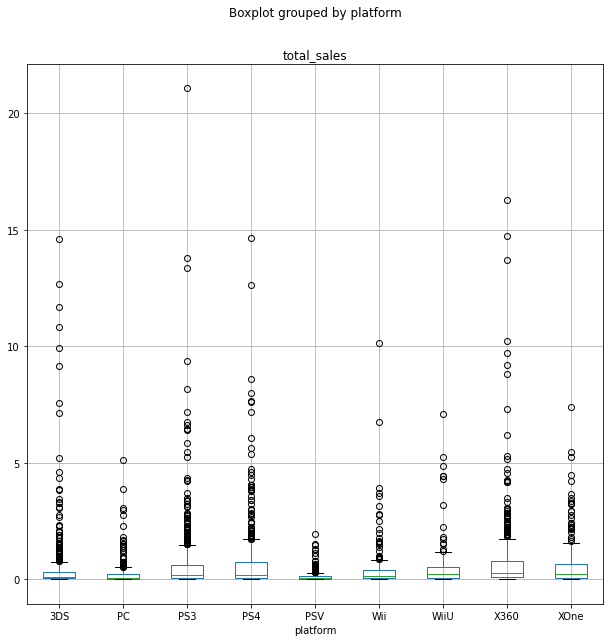

In [171]:
games_edit_1.boxplot(by='platform',column='total_sales',figsize=(10,10))

* Sales across platforms varies, platforms like PS3, X360 and PS4 has high sales compared to other platforms that has weaker sales figures(like PSV and PC)
* The average sales across platforms varies between 0.12(PSV) to 0.80(PS4)
* Most platforms has outliers in their sales figures. PS3 has major outliers in their total sales, which means some games in that platform generate more sales than other games.
* whereas in PSV, we can find that there are only less outliers which means, most games in that platform almost generate same amount of sales.

**Correlation of factors on their sales**

In [172]:
games_edit_1.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.094710,-0.047737,-0.006287,-0.054763,0.092083,-0.020572,-0.071466
na_sales,-0.094710,1.000000,0.777030,0.271002,0.798501,0.308672,0.012241,0.927329
eu_sales,-0.047737,0.777030,1.000000,0.280187,0.943725,0.311134,0.002257,0.931656
jp_sales,-0.006287,0.271002,0.280187,1.000000,0.218895,0.126665,0.152553,0.442680
other_sales,-0.054763,0.798501,0.943725,0.218895,1.000000,0.304347,0.013037,0.915752
critic_score,0.092083,0.308672,0.311134,0.126665,0.304347,1.000000,0.531899,0.330251
user_score,-0.020572,0.012241,0.002257,0.152553,0.013037,0.531899,1.000000,0.028039
total_sales,-0.071466,0.927329,0.931656,0.442680,0.915752,0.330251,0.028039,1.000000


In [173]:
PS3 = games_edit_1[games_edit_1['platform'] == 'PS3']
PS3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Akatsuki no Goei Trinity,PS3,2012,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


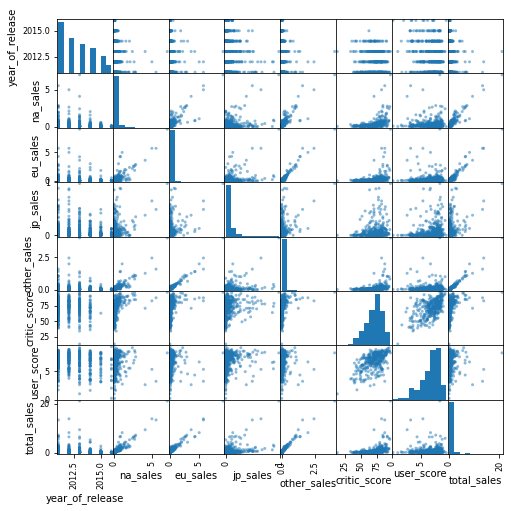

In [174]:
pd.plotting.scatter_matrix(PS3,figsize=(8,8))
plt.show()

In [175]:
PS3['user_score'].corr(PS3['total_sales'])


0.01418653479217583

In [176]:
PS3['critic_score'].corr(PS3['total_sales'])

0.3803132406027347

* In general for the whole games, there is weak correlation shown between the reviews and sales.

To get more insights, we have took a closer look on PS3 platfrom which has high sales figures.
* PS3 platform also makes it evident that there is weak correlation shown between the reviews and sales.

In [177]:
games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.092671,0.003914,-0.168242,0.037588,0.011476,-0.235384,-0.076437
na_sales,-0.092671,1.000000,0.765529,0.450286,0.638700,0.240298,0.085819,0.941082
eu_sales,0.003914,0.765529,1.000000,0.435287,0.722693,0.220765,0.057244,0.901288
jp_sales,-0.168242,0.450286,0.435287,1.000000,0.291221,0.152651,0.118750,0.612689
other_sales,0.037588,0.638700,0.722693,0.291221,1.000000,0.198357,0.057345,0.749208
critic_score,0.011476,0.240298,0.220765,0.152651,0.198357,1.000000,0.540523,0.245238
user_score,-0.235384,0.085819,0.057244,0.118750,0.057345,0.540523,1.000000,0.087629
total_sales,-0.076437,0.941082,0.901288,0.612689,0.749208,0.245238,0.087629,1.000000


In [178]:
games_edit_1.pivot_table(index='name',columns='platform',values='total_sales',aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,
Beyblade Burst,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tales of Xillia 2,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
de Blob 2,NaN,NaN,0.21,NaN,NaN,0.19,NaN,0.15,NaN
htoL#NiQ: The Firefly Diary,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN
inFAMOUS 2,NaN,NaN,1.82,NaN,NaN,NaN,NaN,NaN,NaN


* It is seen from this table that there are 2040 games, so to find the difference of sales of same games across different platforms will be difficult. So we are now going to filter the data to 10 games with the top highest sales.

**Narrowing down games with highest sales**

In [179]:
game_sales = games_edit_1.pivot_table(index='name',values='total_sales',aggfunc='sum').reset_index()

In [180]:
c=game_sales.sort_values(by='total_sales',ascending=False).head(10)
c

,name,total_sales
682,Grand Theft Auto V,56.58
222,Call of Duty: Modern Warfare 3,30.60
219,Call of Duty: Black Ops II,29.40
220,Call of Duty: Ghosts,27.39
218,Call of Duty: Black Ops 3,25.67
1062,Minecraft,24.16
217,Call of Duty: Advanced Warfare,21.97
1711,The Elder Scrolls V: Skyrim,21.14
542,FIFA 15,17.37
151,Battlefield 3,17.27


In [181]:
game_name_chart=c['name'].unique()
game_name_chart

array(['Grand Theft Auto V', 'Call of Duty: Modern Warfare 3',
       'Call of Duty: Black Ops II', 'Call of Duty: Ghosts',
       'Call of Duty: Black Ops 3', 'Minecraft',
       'Call of Duty: Advanced Warfare', 'The Elder Scrolls V: Skyrim',
       'FIFA 15', 'Battlefield 3'], dtype=object)

In [182]:
game_chart = games_edit_1.loc[games_edit_1['name'].isin(game_name_chart)]
game_chart.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [183]:
game_chart_final=game_chart.pivot_table(index='name',columns='platform',values='total_sales',aggfunc='sum')
game_chart_final

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,
Battlefield 3,NaN,2.78,7.17,NaN,NaN,NaN,NaN,7.32,NaN
Call of Duty: Advanced Warfare,NaN,0.41,4.36,7.66,NaN,NaN,NaN,4.28,5.26
Call of Duty: Black Ops 3,NaN,0.26,1.69,14.63,NaN,NaN,NaN,1.70,7.39
Call of Duty: Black Ops II,NaN,1.52,13.79,NaN,NaN,NaN,0.41,13.68,NaN
Call of Duty: Ghosts,NaN,0.69,9.36,3.83,NaN,NaN,0.35,10.24,2.92
Call of Duty: Modern Warfare 3,NaN,1.71,13.33,NaN,NaN,0.83,NaN,14.73,NaN
FIFA 15,0.46,0.29,4.28,6.08,0.60,0.56,NaN,2.92,2.18
Grand Theft Auto V,NaN,1.17,21.05,12.62,NaN,NaN,NaN,16.27,5.47
Minecraft,NaN,NaN,5.27,4.32,1.96,NaN,0.67,9.18,2.76


Text(0.5, 0, 'Game names')

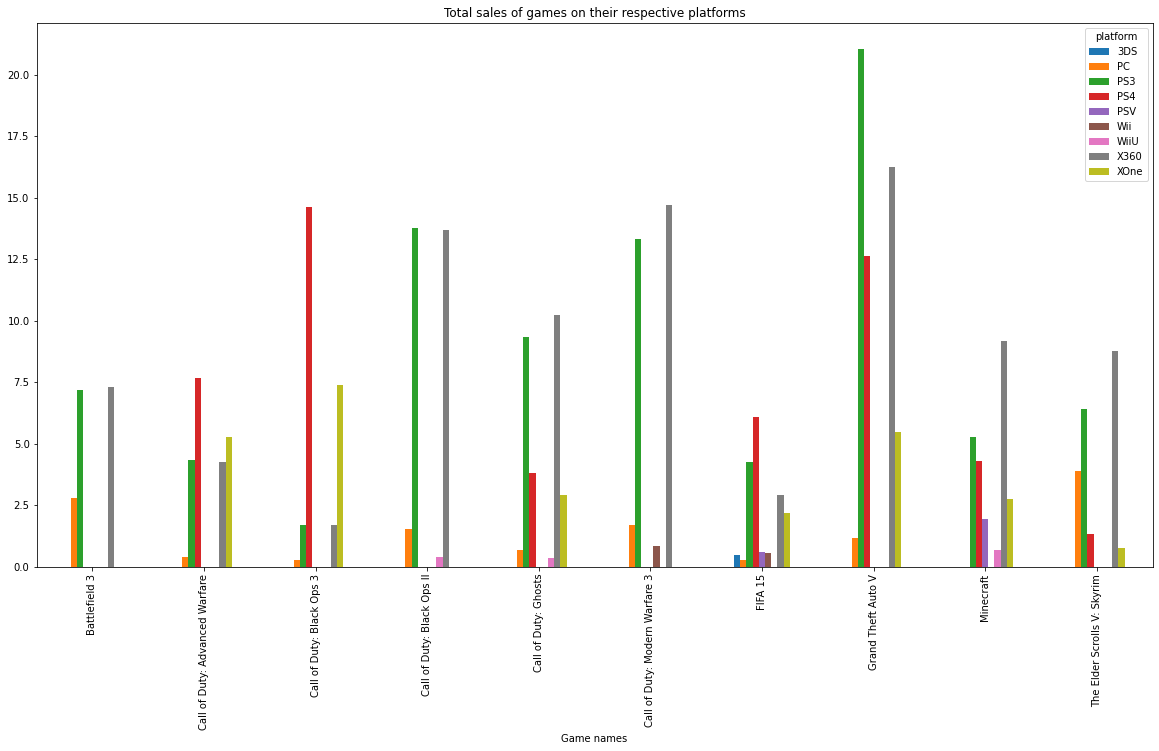

In [184]:
game_chart_final.plot(kind='bar', figsize=(20,10))
plt.title('Total sales of games on their respective platforms')
plt.xlabel('Game names')

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


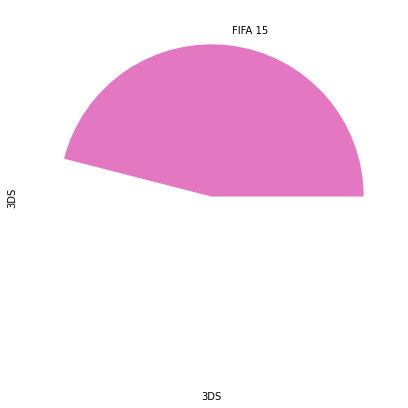

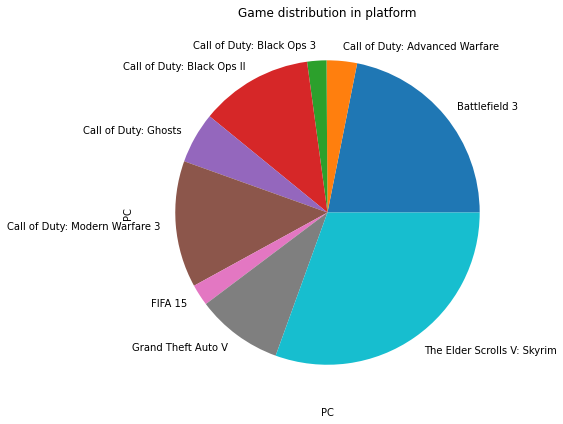

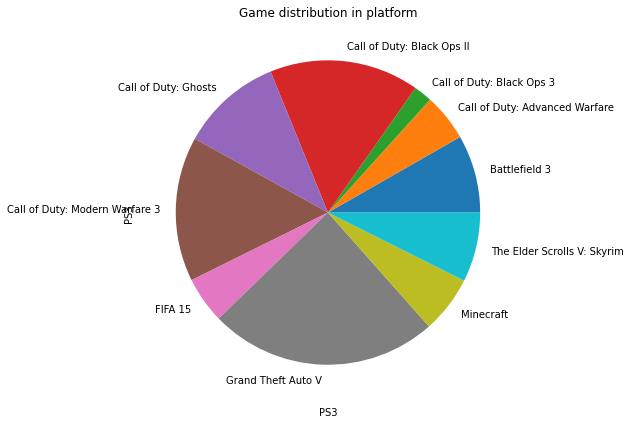

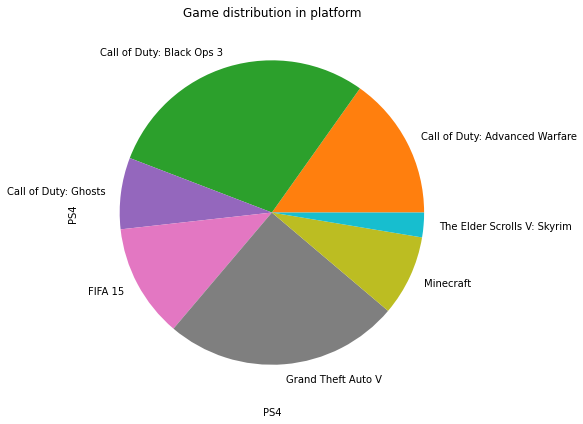

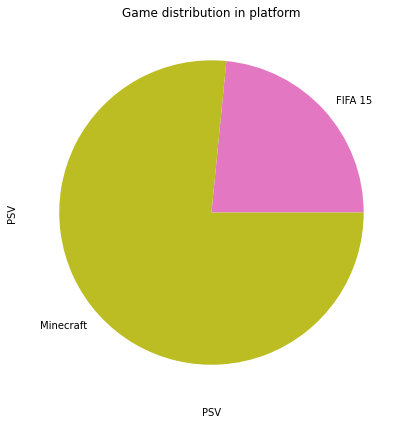

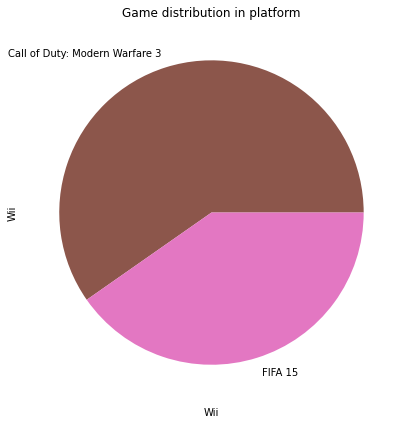

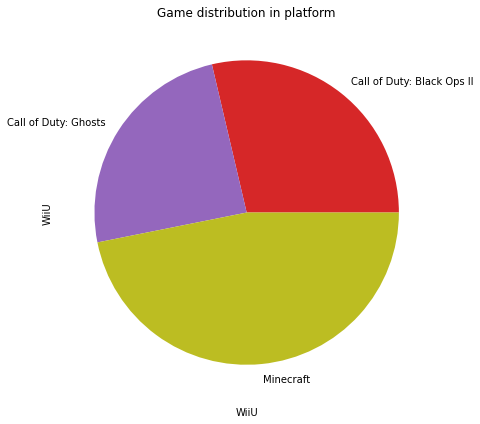

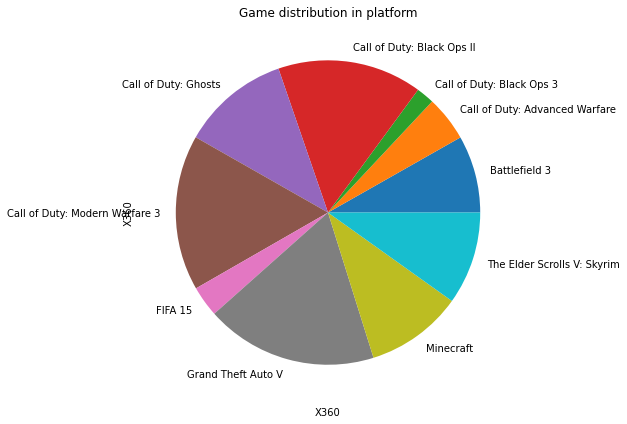

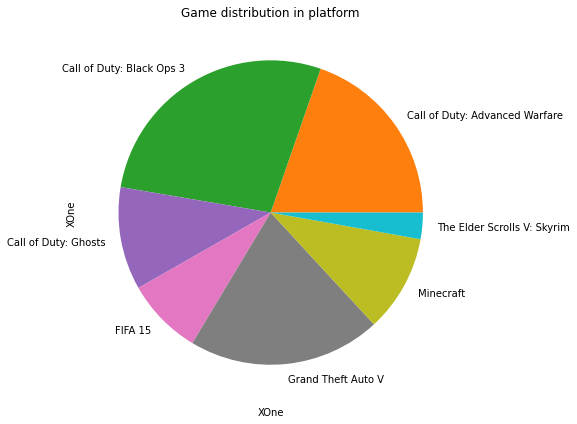

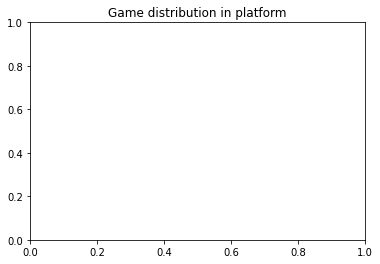

In [185]:
for i in game_chart_final:
    game_chart_final[i].plot(kind='pie',figsize=(7,7))
    plt.xlabel(i)
    plt.show()
    plt.title('Game distribution in platform')


* Here we can see that the sales of same games varies across different platfroms. For some games, they are only presented in few platforms, whereas for some they are presented in many platforms.

**So to find the diference in sales patterns, we will be choosing FIFA 15 and Minecraft, because these games are presented in more platforms, thereby we can deeply findout the platform wise difference in sales.**

Text(0.5, 1.0, 'Total sales of Fifa15 and Minecraft on different platforms')

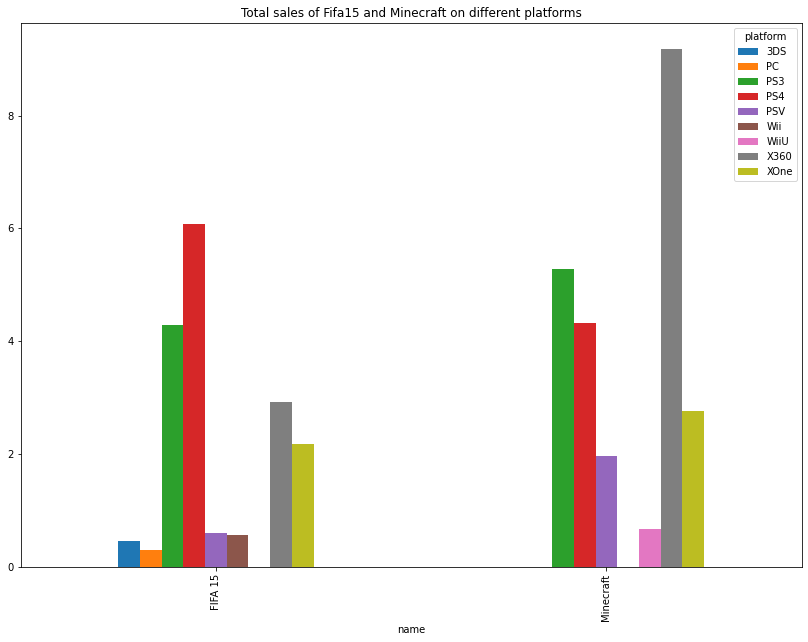

In [186]:
game_chart_final.query('name == "FIFA 15" or name == "Minecraft"').plot(kind='bar', figsize=(14,10))
plt.title('Total sales of Fifa15 and Minecraft on different platforms')

* From this chart we can clearly understand how the sales varies across difference platforms. 
* In case of Minecraft, it is sold in X360 the most, and least in WiiU.
* In case of FIFA 15, It is sold highest in PS4 platform then foloowed by PS3.

In general, we can understad that same game has its sales value different across various platforms.

**Genre wise analysis**

Text(0.5, 1.0, 'Genre wise count of games')

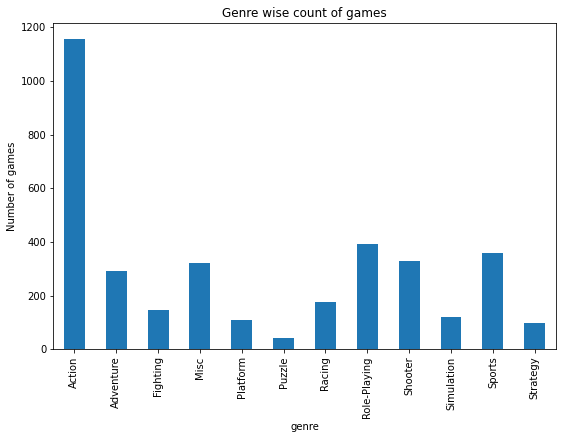

In [187]:
games_edit_1.groupby('genre')['name'].count().plot(kind='bar',figsize=(9,6))
plt.ylabel('Number of games')
plt.title('Genre wise count of games')

* The distribution of games across genres differs. We can see that, most games belongs to the action genre and least games belongs to the puzzle genre.

In [188]:
games_edit_1.pivot_table(index='genre',values='total_sales',aggfunc='sum')

,total_sales
genre,
Action,549.19
Adventure,39.93
Fighting,64.20
Misc,130.41
Platform,86.45
Puzzle,8.39
Racing,86.70
Role-Playing,226.82
Shooter,402.65


* Not just the distribution of games, the total sales also belongs to the games in action genre, and whereas the least revenue genretaed genre is puzzle 

<AxesSubplot:title={'center':'total_sales'}, xlabel='genre'>

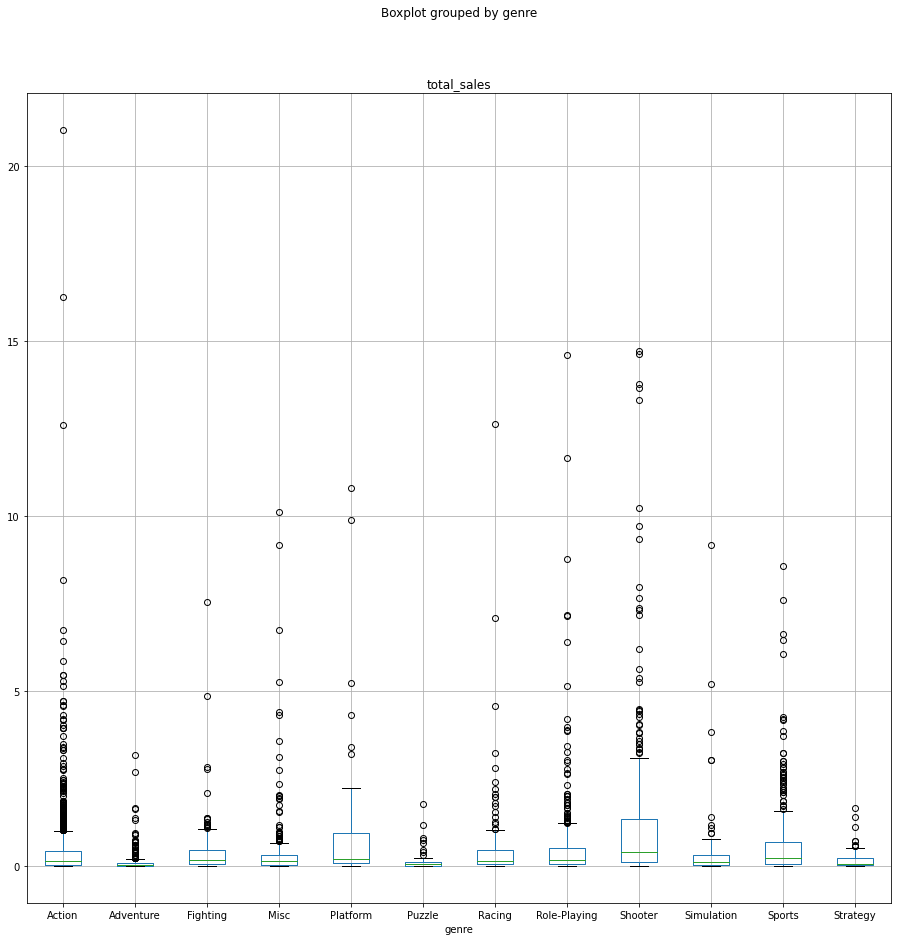

In [189]:
games_edit_1.boxplot(by='genre',column='total_sales',figsize=(15,15))

 **Now we have to look how many games each genre used to produce that revenue**

In [190]:
sales_to_count = games_edit_1.groupby('genre')['total_sales'].sum()/games_edit_1.groupby('genre')['name'].count()
sales_to_count

genre
Action          0.474257
Adventure       0.137216
Fighting        0.442759
Misc            0.407531
Platform        0.778829
Puzzle          0.195116
Racing          0.492614
Role-Playing    0.578622
Shooter         1.223860
Simulation      0.393852
Sports          0.648858
Strategy        0.177959
dtype: float64

* But before coming to a genral conclusion that, puzzle genre is least performing genre, we have to consider the count of games presented in each genre to their sales.

By analyzing that, we can understand, Adventure and staregy genres performs bad than the puzzle genre.

So in generel we cannot understand the success of a genre by just looking at their total sales, as it aslo depends on how many games genrate those sales in that genres.
for e.g., if a genre generates 100usd revnue with the help of 50 games is least performing than a genre generating 30usd revenue with just one game

In [191]:
games_edit_1.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60


**Region wise analysis**

*Analysis of NA region*

In [192]:
na_region = games_edit_1.pivot_table(index='platform',values="na_sales",aggfunc='sum').reset_index().sort_values(by='na_sales',ascending = False)
na_region['na_market_share'] = na_region['na_sales']/sum(na_region['na_sales'])*100
na_region['na_market_share'] =na_region['na_market_share'].round(2)
print(na_region)


  platform  na_sales  na_market_share
7     X360    228.18            28.11
2      PS3    168.96            20.81
3      PS4    108.74            13.39
8     XOne     93.12            11.47
0      3DS     82.83            10.20
5      Wii     49.36             6.08
6     WiiU     38.10             4.69
1       PC     30.08             3.71
4      PSV     12.47             1.54


In [193]:
regions_1=na_region['platform'].head()
regions_1

7    X360
2     PS3
3     PS4
8    XOne
0     3DS
Name: platform, dtype: object

* These are the top five platforms in the NA region

*Analysis of EU region*

In [194]:
eu_region = games_edit_1.pivot_table(index='platform',values="eu_sales",aggfunc='sum').reset_index().sort_values(by='eu_sales',ascending = False)
eu_region['eu_market_share'] = eu_region['eu_sales']/sum(eu_region['eu_sales'])*100
eu_region['eu_market_share'] =eu_region['eu_market_share'].round(2)
print(eu_region)


  platform  eu_sales  eu_market_share
2      PS3    164.15            24.80
3      PS4    141.09            21.32
7     X360    117.87            17.81
0      3DS     61.46             9.29
1       PC     57.38             8.67
8     XOne     51.59             7.80
5      Wii     30.04             4.54
6     WiiU     25.13             3.80
4      PSV     13.07             1.97


In [195]:
regions_2=eu_region['platform'].head()
regions_2

2     PS3
3     PS4
7    X360
0     3DS
1      PC
Name: platform, dtype: object

* These are the top five platforms in the EU region

*Analysis of JP region*

In [196]:
jp_region = games_edit_1.pivot_table(index='platform',values="jp_sales",aggfunc='sum').reset_index().sort_values(by='jp_sales',ascending = False)
jp_region['jp_market_share'] = jp_region['jp_sales']/sum(jp_region['jp_sales'])*100
jp_region['jp_market_share'] =jp_region['jp_market_share'].round(2)
print(jp_region)


  platform  jp_sales  jp_market_share
0      3DS    100.62            47.13
2      PS3     49.40            23.14
4      PSV     21.84            10.23
3      PS4     15.96             7.48
6     WiiU     13.01             6.09
5      Wii      8.97             4.20
7     X360      3.36             1.57
8     XOne      0.34             0.16
1       PC      0.00             0.00


In [197]:
regions_3=jp_region['platform'].head()
regions_3

0     3DS
2     PS3
4     PSV
3     PS4
6    WiiU
Name: platform, dtype: object

* These are the top five platforms in the JP region

*Top platforms across all three regions*

In [198]:
list= pd.merge(regions_1,regions_2,how='outer')
list_final = pd.merge(list,regions_3,how='outer')

In [199]:
list_final

,platform
0,X360
1,PS3
2,PS4
3,XOne
4,3DS
5,PC
6,PSV
7,WiiU


This is the final list of platforms, which belongs to top 5 across three regions

**Market share variation by platforms across three regions**

In [200]:
platform_marktshare_variation= list_final
platform_marktshare_variation = pd.merge(pd.merge(pd.merge(platform_marktshare_variation,na_region[['na_market_share','platform']],how='left'),
                                         eu_region[['eu_market_share','platform']],how='left'),
                                         jp_region[['jp_market_share','platform']],how='left')

                                         
platform_marktshare_variation

,platform,na_market_share,eu_market_share,jp_market_share
0,X360,28.11,17.81,1.57
1,PS3,20.81,24.80,23.14
2,PS4,13.39,21.32,7.48
3,XOne,11.47,7.80,0.16
4,3DS,10.20,9.29,47.13
5,PC,3.71,8.67,0.00
6,PSV,1.54,1.97,10.23
7,WiiU,4.69,3.80,6.09


Text(0.5, 1.0, 'Market share variation by platfroms across 3 regions')

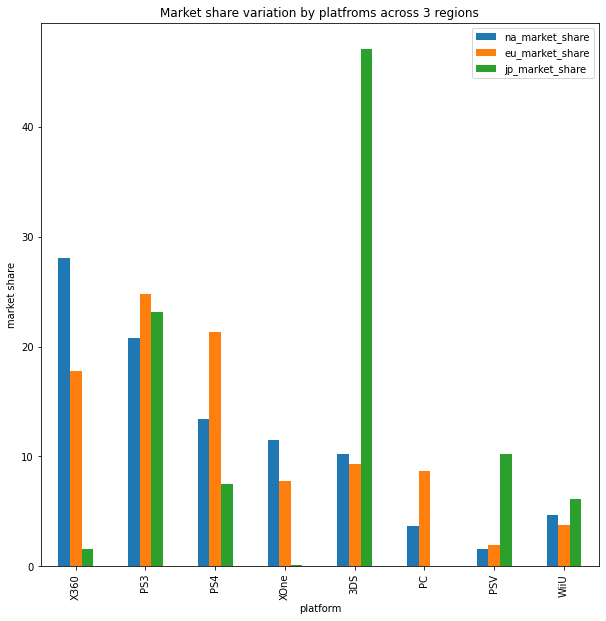

In [201]:
platform_marktshare_variation.plot.bar(x='platform',figsize=(10,10))
plt.ylabel('market share')
plt.title('Market share variation by platfroms across 3 regions')

* Platfrom's market share varies across regions, with some platforms not even presented at certain regions.
* 3DS platform's market share is bery high in the jp region but compartively lower at other two regions.
* WiiU market share is very low in all regions, the plat frm should focus on one region to generate more revenue.
* PS3 has well succeded in maintaing a decent maket share in all regions.

**Market share variation by genre across three regions**

In [202]:
genre_na=games_edit_1.pivot_table(index='genre',values="na_sales",aggfunc='sum').reset_index().sort_values(by='na_sales',ascending = False)
genre_na['na_marketshare'] = round(genre_na['na_sales']/sum(genre_na['na_sales'])*100,2)

print(genre_na.head())

           genre  na_sales  na_marketshare
0         Action    228.90           28.20
8        Shooter    194.20           23.92
10        Sports    107.48           13.24
7   Role-Playing     79.92            9.84
3           Misc     66.22            8.16


In [203]:
genre_eu=games_edit_1.pivot_table(index='genre',values="eu_sales",aggfunc='sum').reset_index().sort_values(by='eu_sales',ascending = False)
genre_eu['eu_marketshare'] = round(genre_eu['eu_sales']/sum(genre_eu['eu_sales'])*100,2)
print(genre_eu.head())


           genre  eu_sales  eu_marketshare
0         Action    198.60           30.01
8        Shooter    148.01           22.37
10        Sports     87.96           13.29
7   Role-Playing     60.36            9.12
6         Racing     40.11            6.06


In [204]:
genre_jp=games_edit_1.pivot_table(index='genre',values="jp_sales",aggfunc='sum').reset_index().sort_values(by='jp_sales',ascending = False)
genre_jp['jp_marketshare'] = round(genre_jp['jp_sales']/sum(genre_jp['jp_sales'])*100,2)
print(genre_jp.head())


          genre  jp_sales  jp_marketshare
7  Role-Playing     67.44           31.59
0        Action     57.85           27.10
3          Misc     14.88            6.97
8       Shooter     11.92            5.58
4      Platform     11.72            5.49


In [205]:
genre_list= pd.merge(pd.merge(genre_na['genre'].head(),genre_eu['genre'].head(),how='outer'),
                     genre_jp['genre'].head(),how='outer')

genre_list

,genre
0,Action
1,Shooter
2,Sports
3,Role-Playing
4,Misc
5,Racing
6,Platform


In [206]:
genre_marktshare_variation = pd.merge(pd.merge(pd.merge(genre_list,genre_na[['genre','na_marketshare']]),
                                      genre_eu[['genre','eu_marketshare']]),
                                      genre_jp[['genre','jp_marketshare']])
genre_marktshare_variation

,genre,na_marketshare,eu_marketshare,jp_marketshare
0,Action,28.20,30.01,27.10
1,Shooter,23.92,22.37,5.58
2,Sports,13.24,13.29,4.22
3,Role-Playing,9.84,9.12,31.59
4,Misc,8.16,5.67,6.97
5,Racing,3.82,6.06,2.62
6,Platform,4.58,4.46,5.49


Text(0.5, 1.0, 'Market share variation by genre across three regions')

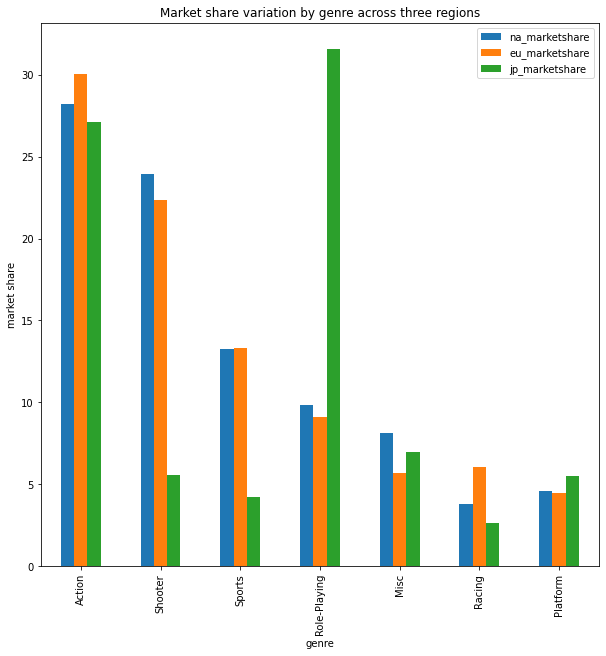

In [207]:
genre_marktshare_variation.plot.bar(x='genre',figsize=(10,10))
plt.ylabel('market share')
plt.title('Market share variation by genre across three regions')

* Action genre is famous across all the reions. Action market share is almost equally maintained over all regions.
* Roleplaying genre is very famous and genreated more sales compared to other genres in jp region.
* sports and shooter genres are famous in na and eu regions compared to jp region.

*Analysis of sales accroding to the ratings*

,eu_sales,jp_sales,na_sales
rating,,,
E,137.41,35.04,160.68
E10+,77.50,10.96,116.04
M,251.40,26.11,309.32
RP,0.03,0.00,0.00
T,83.02,32.12,108.81


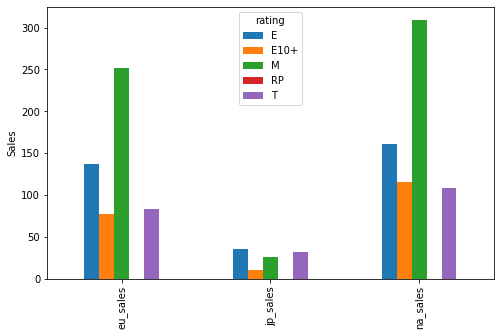

In [208]:
rating_region=games_edit_1.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
rating_region.T.plot.bar(figsize=(8,5))
plt.ylabel('Sales')
rating_region

* From the graph it is clear that rating affect the sales in indvidual regions.
* M rated games generate more sales in Eu and Na regions

## Hypothesis

In [209]:
xone_rating = games_edit_1[games_edit_1['platform'] == 'XOne']
xone_rating = xone_rating['user_score']
xone_rating=xone_rating.dropna()
xone_rating

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 185, dtype: float64

In [210]:
pc_rating = games_edit_1[games_edit_1['platform'] == 'PC']
pc_rating
pc_rating = pc_rating['user_score']
pc_rating=pc_rating.dropna()
pc_rating

192      4.0
313      8.1
458      3.9
480      5.9
538      7.5
        ... 
16518    1.4
16584    7.9
16692    7.6
16696    5.8
16702    7.2
Name: user_score, Length: 318, dtype: float64

* Null hypothesis, H0 : Average user ratings of the Xbox One and PC platforms are the same.
* Alternative hypothesis, H1 : Average user ratings of the Xbox One and PC platforms differs

In [211]:
alpha=0.05

results=st.ttest_ind(xone_rating,pc_rating)

print('p-value:', results.pvalue)

if (results.pvalue<alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.7510783987936727
We can't reject the null hypothesis


* The average user ratings of the Xbox One and PC platforms are the same

In [212]:
Action_rating = games_edit_1[games_edit_1['genre'] == 'Action']
Action_rating = Action_rating['user_score']
Action_rating=Action_rating.dropna()
Action_rating

16       8.2
23       8.1
42       8.3
81       6.6
118      8.3
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 692, dtype: float64

In [213]:
Sports_rating = games_edit_1[games_edit_1['genre'] == 'Sports']
Sports_rating = Sports_rating['user_score']
Sports_rating=Sports_rating.dropna()
Sports_rating

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16146    6.9
16230    5.5
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 260, dtype: float64

* Null hypothesis: Average user ratings of the Action and Sports genre are the same.
* Alternative hypothesis: Average user ratings of the Action and Sports genre differs

In [214]:
alpha=0.05

results=st.ttest_ind(Action_rating,Sports_rating)

print('p-value:', results.pvalue)

if (results.pvalue<alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 4.059505254090439e-20
We reject the null hypothesis


* The average user ratings of the Action and Sports genre differs

## Conclusions

* As of 2016 data, PS4 platform is leading in sales followed by XOne
* None of the platforms has shown positively incersing sales trend in recent years
* But PS4 and Xone can be considered as potentialy profitable platforms as these platfrom sales start declining only from 2015, a innovative update would help these platforms to gain positive momentum.
* Sales across platforms varies, platforms like PS3, X360 and PS4 has high sales compared to other platforms that has weaker sales figures(like PSV and PC)
* The distribution of games across genres differs. We can see that, most games belongs to the action genre and least games belongs to the puzzle genre
* PS3 has well succeded in maintaing a decent maket share in all regions.
* In general, more campaigns should focus on games on PS3 platforms and also which belongs to Action genre